In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['cnn-captcha', 'weights']


In [3]:
import requests as req
from bs4 import BeautifulSoup

In [4]:
url = 'https://rosreestr.ru/wps/portal/online_request'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2224.3 Safari/537.36'}
page = req.get(url, headers = headers)
print(page.content)

b'<!DOCTYPE html>\n<html lang="ru" xml:lang="ru">\n<head>\n\t<!--<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, minimum-scale=1"/>-->\n\t<meta name="google-site-verification" content="rVxCzUlW0G3ecSPGtVqlLM5AtY-yfSoX5n8DCA4pdcE"/>\n\t<link rel="stylesheet" href="/wps/contenthandler/!ut/p/digest!i7j42wVIH2kObPvgdhUqKA/sp/mashup:ra:collection?themeID=ZJ_GQ4E1C41KOMJ20AIOTDK0F3085&amp;locale=en&amp;mime-type=text%2Fcss&amp;entry=wp_one_ui_30__0.0%3Ahead_css&amp;entry=wp_one_ui_dijit_30__0.0%3Ahead_css&amp;entry=wp_status_bar__0.0%3Ahead_css&amp;entry=wp_portlet_css__0.0%3Ahead_css&amp;entry=wp_theme_portal_80__0.0%3Ahead_css&amp;entry=wp_legacy_layouts__0.0%3Ahead_css&amp;entry=wp_project_menu__0.0%3Ahead_css&amp;entry=wp_ic4_wai_resources__0.0%3Ahead_css&amp;entry=wp_preview__0.0%3Ahead_css&amp;entry=wp_oob_sample_styles__0.0%3Ahead_css" type="text/css"/><link rel="alternate" id="head_css_deferred" href="/wps/contenthandler/!ut/p/digest!D60zoVlAaCtfI

In [5]:
soup = BeautifulSoup(page.text,'html.parser')
soup.html.head.title

<title>Справочная информация по объектам недвижимости в режиме online - Портал услуг Федеральной службы государственной регистрации, кадастра и картографии</title>

In [6]:
# soup.findAll(lambda tag: tag.get('class') == ['brdg1111'])

In [7]:
soup.find("img", attrs={ "id" : "captchaImage2"})
#soup.findAll(lambda tag: tag.get('id') == ['captchaImage2'])

<img id="captchaImage2" src="p0/IZ7_01HA1A42KODT90AR30VLN22001=CZ6_GQ4E1C41KGQ170AIAK131G00T5=NJcaptcha=/"/>

In [8]:
from PIL import Image as IM
from io import BytesIO

In [9]:
# response = req.get('https://rosreestr.ru/wps/portal/p/cc_ib_portal_services/online_request/!ut/p/z1/04_Sj9CPykssy0xPLMnMz0vMAfIjo8zi3QNNXA2dTQy93QMNzQ0cPR29DY0N3Q0MQkz1w_Eq8DfUj6JEP1ABSL8BDuBoANQfhdcKZyMCCkBOJGRJQW5ohEGmpyIAKLXudw!!/p0/IZ7_01HA1A42KODT90AR30VLN22001=CZ6_GQ4E1C41KGQ170AIAK131G00T5=NJcaptcha=/')
# img = IM.open(BytesIO(response.content))
# img_2 = np.copy(img)

In [10]:
import cv2
import numpy as np
import io
from IPython.display import display,Image,clear_output

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.utils import np_utils

Using TensorFlow backend.


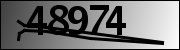

In [12]:
response = req.get('https://rosreestr.ru/wps/portal/p/cc_ib_portal_services/online_request/!ut/p/z1/04_Sj9CPykssy0xPLMnMz0vMAfIjo8zi3QNNXA2dTQy93QMNzQ0cPR29DY0N3Q0MQkz1w_Eq8DfUj6JEP1ABSL8BDuBoANQfhdcKZyMCCkBOJGRJQW5ohEGmpyIAKLXudw!!/p0/IZ7_01HA1A42KODT90AR30VLN22001=CZ6_GQ4E1C41KGQ170AIAK131G00T5=NJcaptcha=/')
captcha_byte = io.BytesIO(response.content)
image = Image(captcha_byte.getvalue(), format='jpeg')
img_2 = np.copy(IM.open(BytesIO(response.content)))
img_2.shape
image

In [ ]:
import os
import io
from PIL import Image as IM
from IPython.display import display,Image,clear_output
import numpy as np
from scipy.misc import toimage
from sklearn import preprocessing
import requests
from bs4 import BeautifulSoup as BS
import time

In [ ]:
class captcha_recognize:
    def __init__(self):
        self.model = self.load_model()
        self.lable = ['2', '3', '4', '6', '7', '8', '9', 'A', 'C', 'D', 'E', 'F', 'G','H', 'J', 
                      'K', 'L', 'N', 'P', 'Q', 'R', 'T', 'U', 'V', 'X', 'Y', 'Z']
    def one_hot_reverse(self,onehot):
        return self.lable[np.where(onehot==1)[0][0]]
    def load_model(self):
        self.model = model_from_json(open('../input/cnn-captcha/cnn_captcha.json').read())
        self.model.load_weights('../input/weights/TWSE_captcha_weights.h5')

        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        self.model.compile(loss='categorical_crossentropy',
                      optimizer=sgd,
                      metrics=['accuracy'])
    def preprocess(self,image):
        X = []
        imgpos = [[5,45],[45,85],[85,125],[125,165],[160,200]]
        #image = IM.open('/home/ubuntu/Notebooks/captest.png')
        imgarray = np.asarray(image)
        for tid in range(5):
            X.append(imgarray[10:50,imgpos[tid][0]:imgpos[tid][1]].reshape(3, 40, 40))
        X = np.array(X).astype('float32')
        X /= 255
        return X
    
    def captcha_predict(self,X):
        if type(self.model)!= Sequential:
            self.load_model()
        ans = self.model.predict(X)
        captcha =''
        for i in ans:
            captcha += self.lable[i.argmax()]
        return captcha

In [ ]:
import cv2
import PIL
resized = cv2.resize(img_2, (200, 60), interpolation = cv2.INTER_AREA)
print(resized.shape)
resized_image = PIL.Image.fromarray(resized)
resized_image

In [ ]:
type(response.content)

In [ ]:
PIL_image = IM.open(captcha_byte)
cap = captcha_recognize().captcha_predict(captcha_recognize().preprocess(resized_image))
display(resized_image, cap)

In [ ]:
resp_capt = req.get('https://hlps.ru/sites/default/files/note/captcha-internet-translate.jpg')
captcha = Image.open(BytesIO(resp_capt.content))
captcha_2 = np.copy(captcha)

In [ ]:
gray = cv2.cvtColor(captcha_2, cv2.COLOR_RGB2GRAY)

In [ ]:
greyblur = cv2.GaussianBlur(gray, (5,5), 0)

In [ ]:
import pytesseract
pytesseract.image_to_string(greyblur, lang='eng')

In [ ]:
!git clone https://github.com/JackonYang/captcha-tensorflow

In [ ]:
rs = requests.session()
r1 = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
r1.encoding = 'utf-8'
soup = BS(r1.text)
guid = soup.findAll('img')[1].attrs['src']
VIEWSTATE = soup.select('#__VIEWSTATE')[0].attrs['value']
EVENTVALIDATION = soup.select('#__EVENTVALIDATION')[0].attrs['value']
captcha = rs.get('http://bsr.twse.com.tw/bshtm/%s'%guid, stream=True, verify=False)
captcha_byte = io.BytesIO(captcha.content)
not_my_img = Image(captcha_byte.getvalue(), format='jpeg')
not_my_img_2 = np.copy(IM.open(captcha_byte))
not_my_img_2.shape

In [ ]:
import pytesseract
#resp = req.get('https://zarabatyvai.online/wp-content/uploads/2019/03/lljpa9e4ljfupbarvwmbpj2v_ia.jpeg')
#captcha = Image.open(BytesIO(resp.content))
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pytesseract.image_to_string(img, lang='eng')

In [1]:
!pip install captcha-solver

  Stored in directory: /tmp/.cache/pip/wheels/c4/bc/0f/d65e1c745932b9cea4b6f0aa5ee02fc9b3d89ca8cde4ce71bb
Successfully built captcha-solver
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
from captcha_solver import CaptchaSolver

solver = CaptchaSolver('browser')
print(solver.solve_captcha(captcha_byte))

TypeError: a bytes-like object is required, not '_io.BytesIO'